# Modulos

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os


In [11]:
#notebook_path = os.path.abspath("./Python/variations.xls")


# Tratamento de Dados

Criar data frame e colocar primeira coluna como sample

In [17]:
raw_data = pd.read_excel(
    "../Python/variations.xls", sheet_name="variations")
    #"./projects/covid/variations.xls", sheet_name="variations")

raw_df = pd.DataFrame(raw_data)
raw_df.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)
raw_df

,sample,REF,ALT,#
0,sample_5390,NaN,NaN,NaN
1,NaN,A,G,1.0
2,NaN,C,T,4.0
3,NaN,GGG,AAC,1.0
4,sample_5391,NaN,NaN,NaN
...,...,...,...,...
9965,NaN,GAGTTCAG,GG,1.0
9966,NaN,G,T,13.0
9967,NaN,TAA,TA,1.0
9968,NaN,T,C,3.0


preencher os valores NA da primeira coluna (sample) com os valores anteriores




In [18]:
raw_df['sample'].ffill(inplace=True)
raw_df
# test_df.tail(50)

,sample,REF,ALT,#
0,sample_5390,NaN,NaN,NaN
1,sample_5390,A,G,1.0
2,sample_5390,C,T,4.0
3,sample_5390,GGG,AAC,1.0
4,sample_5391,NaN,NaN,NaN
...,...,...,...,...
9965,sample_31308,GAGTTCAG,GG,1.0
9966,sample_31308,G,T,13.0
9967,sample_31308,TAA,TA,1.0
9968,sample_31308,T,C,3.0


Retirar valores NA das restantes colunas (Ref, Alt e #)

In [20]:
raw_df = raw_df.dropna(axis=0, how="any")
raw_df

#Como alternativa:
#data_no_na = test_df[['REF', 'ALT', '#']].apply(lambda x: pd.Series(x.dropna().values)) -> alternativa para remover os NAs


,sample,REF,ALT,#
1,sample_5390,A,G,1.0
2,sample_5390,C,T,4.0
3,sample_5390,GGG,AAC,1.0
5,sample_5391,A,G,1.0
6,sample_5391,C,T,4.0
...,...,...,...,...
9965,sample_31308,GAGTTCAG,GG,1.0
9966,sample_31308,G,T,13.0
9967,sample_31308,TAA,TA,1.0
9968,sample_31308,T,C,3.0


Usar `pivot` para colocar a coluna sample como index, as colunas REF e ALT passam para as primeiras 2 rows 

In [21]:
# final_data = raw_df.pivot(index="sample",
#                               columns=["REF", "ALT"], values=("#"))
# final_data.columns.name

final_df = (raw_df.set_index(['sample', 'REF', 'ALT'])
                ['#']
                .unstack(['REF', 'ALT'], fill_value=0)
                )
final_df

REF,A,C,GGG,C,T,G,AATGA,A,T,G,...,CTCGG,CTTAC,GCG,TTTAC,CCTG,CTG,TATGG,ATATGAGT,GTGTTTATTAC,TTCCATTTGGAAT
ALT,G,T,AAC,A,C,T,AA,T,A,A,...,GTCGT,TTTAG,TCA,TC,TCTT,ATT,TG,AT,ATGTTTAC,TT
sample,,,,,,,,,,,,,,,,,,,,,
sample_24115,4.0,16.0,0.0,1.0,3.0,11.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24116,4.0,13.0,0.0,2.0,2.0,7.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24117,4.0,14.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24118,4.0,15.0,0.0,2.0,2.0,13.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24119,4.0,16.0,0.0,1.0,3.0,12.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_6364,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_6365,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Guardar em excel



In [22]:
final_df.to_excel('final_df.xlsx')

# PCA analysis


* Centrar e fazer scaling aos dados
NOTA: Se as nossas amostras estivessem nas colunas, colocar `preprocessing.scale(final_data_2.T)` para fazer a transposiçao

In [23]:
scaled_data = preprocessing.scale(final_df)
# Como alternativa podemos usar o seguinte código para centrar os dados:
# StandardScaler().fit_transform(final_data_2)

pca = PCA()
pca.fit(scaled_data)  # calcular loading scores e variaçao para cada PCA
pca_data = pca.transform(scaled_data)

Scree plot para ver quantas componentes devem estar presentes no plot final. Este plot é usado para determinar o numero de fatores/principal components para uma analise de PCA.

* Calcular % de variabilidade que cada PC tem

In [24]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)


* Criar labels para cada PC (PC1, PC2, PC3...) tendo em conta o tamanho da variabilidade

In [25]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]


* Fazer plot do spree plot

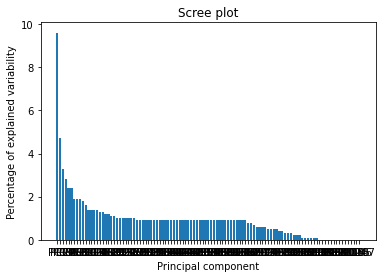

In [26]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variability')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()  # grande parte da variabilidade está presente nos primeiros 9 componentes (cut-off point de 2). Estes 9 PC podem fazer uma boa representaçao geral dos dados

5. Colocar as principais coordenadas (9) numa data frame onde os rows são os samples e as colunas tem a PC label


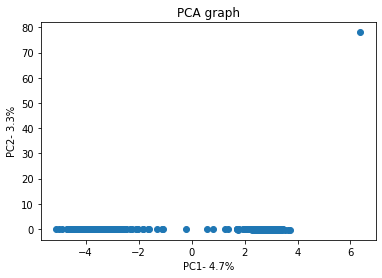

In [27]:
pca_data

#Guardar as labels das amostras numa variavel unica de modo a colocar como indice na data frame dos PCs
sample_labels = final_df.index
sample_labels

pca_df = pd.DataFrame(pca_data, index=[sample_labels], columns=labels)
pca_df

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel('PC1- {0}%'.format(per_var[1]))
plt.ylabel('PC2- {0}%'.format(per_var[2]))
plt.show()
